In [1]:
import torch
from train_dnn_seg import prepare_dataloader

configs = {
    "window_duration": 0.04,
    "window_shift": 0.02,
    "n_frames": 49,
    "n_mels": 40,
    "n_feature": 40,
    "feature_type": "logfbanks",
    "learing_rate": 0.001,
    "batch_size": 64,       # 64*10=640
    "p_dropout": 0,
    "model_type": "dnn"
}
device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")

train_loader, dev_loader, eval_loader = prepare_dataloader(configs)
print("Data preparing done")

(3008, 10, 1960)
(379, 10, 1960)
(330, 10, 1960)
train:	3008, 47
dev:	379, 6
eval:	330, 6
Data preparing done


In [8]:
from train_dnn_seg import train
from dnn_model import DNN3

model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg_fb/dnn3/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=3)

model preparing done
Epoch-1: train loss=1.6017, dev acc=0.5047, dev wav acc=0.5119| Model saving...
Epoch-2: train loss=1.3488, dev acc=0.5660, dev wav acc=0.5963| Model saving...
Epoch-3: train loss=1.2703, dev acc=0.5641, dev wav acc=0.6148 
Epoch-4: train loss=1.2130, dev acc=0.5786, dev wav acc=0.6095| Model saving...
Epoch-5: train loss=1.1596, dev acc=0.5799, dev wav acc=0.6069| Model saving...
Epoch-6: train loss=1.0933, dev acc=0.5876, dev wav acc=0.6095| Model saving...
Epoch-7: train loss=1.0712, dev acc=0.6388, dev wav acc=0.6834| Model saving...
Epoch-8: train loss=1.0560, dev acc=0.6433, dev wav acc=0.6992| Model saving...
Epoch-9: train loss=0.9979, dev acc=0.6100, dev wav acc=0.6517 
Epoch-10: train loss=0.9627, dev acc=0.6303, dev wav acc=0.6728 
Epoch-11: train loss=0.9134, dev acc=0.6612, dev wav acc=0.7203| Model saving...
Epoch-12: train loss=0.9093, dev acc=0.6580, dev wav acc=0.7018 
Epoch-13: train loss=0.8804, dev acc=0.6612, dev wav acc=0.7230 
Epoch-14: train

In [9]:
from train_dnn_seg import eval_step
from dnn_model import DNN3

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4518, wav=0.4606
2-test accurary: segs=0.4979, wav=0.5152
3-test accurary: segs=0.4503, wav=0.4667
4-test accurary: segs=0.4827, wav=0.5121
5-test accurary: segs=0.4830, wav=0.5030
6-test accurary: segs=0.4961, wav=0.5152
7-test accurary: segs=0.4921, wav=0.5182
8-test accurary: segs=0.5024, wav=0.5394
9-test accurary: segs=0.4636, wav=0.4758
10-test accurary: segs=0.4797, wav=0.5121
11-test accurary: segs=0.5064, wav=0.5394
12-test accurary: segs=0.5045, wav=0.5485
13-test accurary: segs=0.4730, wav=0.5000
14-test accurary: segs=0.5021, wav=0.5303
15-test accurary: segs=0.4882, wav=0.5364
16-test accurary: segs=0.4961, wav=0.5273
17-test accurary: segs=0.5082, wav=0.5424
18-test accurary: segs=0.5106, wav=0.5455
19-test accurary: segs=0.4752, wav=0.5273
20-test accurary: segs=0.5179, wav=0.5667
21-test accurary: segs=0.5300, wav=0.5515
22-test accurary: segs=0.5130, wav=0.5485
23-test accurary: segs=0.4942, wav=0.5273
24-test accurary: segs=0.4903, wav=0.5455
2

---
best model

In [2]:
from train_dnn_seg import train
from dnn_model import DNN4

configs["p_dropout"] = 0
model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg_fb/dnn4/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=10)

model preparing done
Epoch-1: train loss=1.5872, dev acc=0.5042, dev wav acc=0.5066| Model saving...
Epoch-2: train loss=1.3309, dev acc=0.5309, dev wav acc=0.5515| Model saving...
Epoch-3: train loss=1.2344, dev acc=0.6058, dev wav acc=0.6253| Model saving...
Epoch-4: train loss=1.1730, dev acc=0.5910, dev wav acc=0.6306 
Epoch-5: train loss=1.1405, dev acc=0.6296, dev wav acc=0.6807| Model saving...
Epoch-6: train loss=1.0668, dev acc=0.6084, dev wav acc=0.6438 
Epoch-7: train loss=1.0141, dev acc=0.6449, dev wav acc=0.6913| Model saving...
Epoch-8: train loss=0.9714, dev acc=0.6620, dev wav acc=0.7282| Model saving...
Epoch-9: train loss=0.9338, dev acc=0.6441, dev wav acc=0.6807 
Epoch-10: train loss=0.9143, dev acc=0.6818, dev wav acc=0.7203| Model saving...
Epoch-11: train loss=0.8735, dev acc=0.6332, dev wav acc=0.6939 
Epoch-12: train loss=0.8396, dev acc=0.6660, dev wav acc=0.7309 
Epoch-13: train loss=0.8094, dev acc=0.6786, dev wav acc=0.7361 
Epoch-14: train loss=0.8080, de

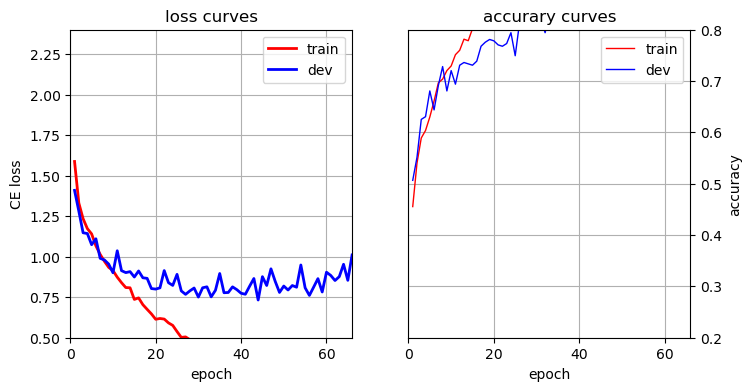

In [3]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_wav_list, dev_loss_list, dev_acc_wav_list)

In [4]:
from train_dnn_seg import eval_step

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4764, wav=0.5030
2-test accurary: segs=0.4376, wav=0.4273
3-test accurary: segs=0.4845, wav=0.5212
4-test accurary: segs=0.4724, wav=0.5030
5-test accurary: segs=0.4509, wav=0.4697
6-test accurary: segs=0.4461, wav=0.4697
7-test accurary: segs=0.5155, wav=0.5455
8-test accurary: segs=0.4709, wav=0.5061
9-test accurary: segs=0.5133, wav=0.5727
10-test accurary: segs=0.4927, wav=0.5121
11-test accurary: segs=0.4242, wav=0.4727
12-test accurary: segs=0.5085, wav=0.5394
13-test accurary: segs=0.5033, wav=0.5333
14-test accurary: segs=0.4797, wav=0.5364
15-test accurary: segs=0.4852, wav=0.5182
16-test accurary: segs=0.4600, wav=0.5121
17-test accurary: segs=0.4933, wav=0.5364
18-test accurary: segs=0.4861, wav=0.5333
19-test accurary: segs=0.4939, wav=0.5485
20-test accurary: segs=0.5212, wav=0.5636
21-test accurary: segs=0.5239, wav=0.5848
22-test accurary: segs=0.4445, wav=0.4939
23-test accurary: segs=0.5276, wav=0.5697
24-test accurary: segs=0.4733, wav=0.5303
2

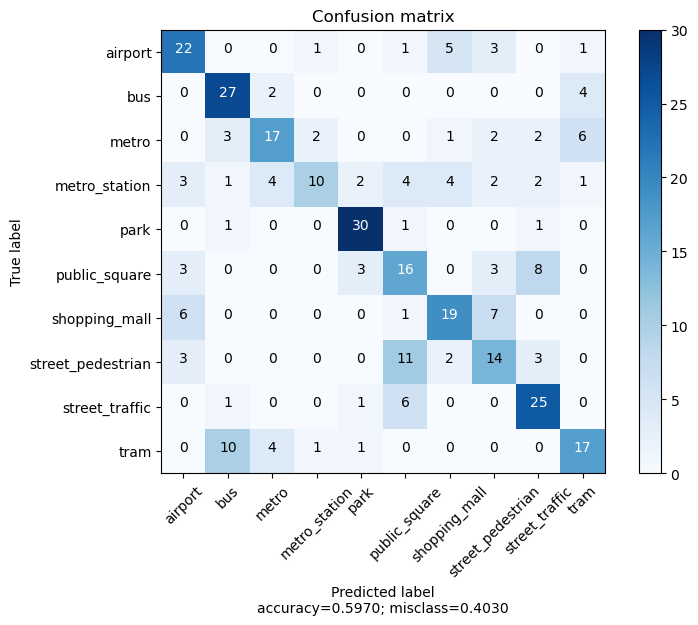

In [10]:
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix
unique_labels = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square',
                 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
modelpath = "/data/lujd/algorithm2022/model/seg_fb/dnn4/"
modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], 27)
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
eval_cm = confusion_matrix(true_label_list, pre_label_list)
plot_confusion_matrix(eval_cm, unique_labels)

In [6]:
from train_dnn_seg import train
from dnn_model import DNN4

model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.001
modelpath = "/data/lujd/algorithm2022/model/seg_fb/dnn4_2/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=10)

model preparing done
Epoch-1: train loss=1.5865, dev acc=0.5208, dev wav acc=0.5435| Model saving...
Epoch-2: train loss=1.3885, dev acc=0.5483, dev wav acc=0.5726| Model saving...
Epoch-3: train loss=1.2887, dev acc=0.5179, dev wav acc=0.5594 
Epoch-4: train loss=1.2318, dev acc=0.5699, dev wav acc=0.6095| Model saving...
Epoch-5: train loss=1.1595, dev acc=0.6008, dev wav acc=0.6332| Model saving...
Epoch-6: train loss=1.0929, dev acc=0.6003, dev wav acc=0.6412 
Epoch-7: train loss=1.0743, dev acc=0.5926, dev wav acc=0.6253 
Epoch-8: train loss=1.0481, dev acc=0.6187, dev wav acc=0.6649| Model saving...
Epoch-9: train loss=0.9698, dev acc=0.6612, dev wav acc=0.7309| Model saving...
Epoch-10: train loss=0.9471, dev acc=0.6644, dev wav acc=0.7124| Model saving...
Epoch-11: train loss=0.9092, dev acc=0.6459, dev wav acc=0.6913 
Epoch-12: train loss=0.8766, dev acc=0.6734, dev wav acc=0.7230| Model saving...
Epoch-13: train loss=0.8546, dev acc=0.6966, dev wav acc=0.7573| Model saving...

In [7]:
from train_dnn_seg import eval_step

epochs = len(train_loss_list)
test_device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4555, wav=0.4667
2-test accurary: segs=0.5130, wav=0.5242
3-test accurary: segs=0.4239, wav=0.4242
4-test accurary: segs=0.4594, wav=0.4848
5-test accurary: segs=0.4773, wav=0.5152
6-test accurary: segs=0.4442, wav=0.4848
7-test accurary: segs=0.4870, wav=0.5242
8-test accurary: segs=0.4452, wav=0.4727
9-test accurary: segs=0.4555, wav=0.4848
10-test accurary: segs=0.5000, wav=0.5394
11-test accurary: segs=0.4718, wav=0.5212
12-test accurary: segs=0.4694, wav=0.5061
13-test accurary: segs=0.4530, wav=0.4939
14-test accurary: segs=0.4815, wav=0.5152
15-test accurary: segs=0.4955, wav=0.5455
16-test accurary: segs=0.4506, wav=0.4879
17-test accurary: segs=0.5164, wav=0.5545
18-test accurary: segs=0.4903, wav=0.5273
19-test accurary: segs=0.4779, wav=0.5424
20-test accurary: segs=0.5161, wav=0.5606
21-test accurary: segs=0.4903, wav=0.5273
22-test accurary: segs=0.5130, wav=0.5636
23-test accurary: segs=0.4842, wav=0.5364
24-test accurary: segs=0.5009, wav=0.5515
2